<h2 align="center">Table of Contents</h2> 

   * [**Part 1: Import and Clean data**](#part1)
  
   * [**Part 2: Visualize Datat**](#part2)

   * [**Part 3: Other Insights**](#part3)

   * [**Conclusion**](#4)
   

### <center> Part 1: Import and Clean data <a class="anchor" id="part1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"D:\Dataa\Python\Casestudy\Nobel_Price\data.csv")
df.head()

,Year,Category,Prize,Motivation,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Birth Country         943 non-null    object
 11  Sex                   943 non-null    object
 12  Organization Name     722 non-null    object
 13  Organization City     716 non-null    object
 14  Organization Country  716 non-null    object
 15  Death Date            617 non-null    ob

In [3]:
# birthday & deathday convert to datetime
df["Birth Date"] = pd.to_datetime(df["Birth Date"], errors='coerce')
df["Death Date"] = pd.to_datetime(df["Birth Date"], errors='coerce')
df["Birth Date"].fillna("NaT", inplace = True)
df["Death Date"].fillna("NaT", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Year                  969 non-null    int64         
 1   Category              969 non-null    object        
 2   Prize                 969 non-null    object        
 3   Motivation            881 non-null    object        
 4   Prize Share           969 non-null    object        
 5   Laureate ID           969 non-null    int64         
 6   Laureate Type         969 non-null    object        
 7   Full Name             969 non-null    object        
 8   Birth Date            938 non-null    datetime64[ns]
 9   Birth City            941 non-null    object        
 10  Birth Country         943 non-null    object        
 11  Sex                   943 non-null    object        
 12  Organization Name     722 non-null    object        
 13  Organization City   

In [4]:
# fill N/A value from Organization column with 'Unknown'

Org_cols = ["Organization Name", "Organization City", "Organization Country"]
for i in Org_cols:
    df[i].fillna("Unknown", inplace =True)

In [5]:
df.drop(columns =["Prize", "Motivation", "Laureate ID"], inplace = True)

In [6]:
df.describe(include = "O")

,Category,Prize Share,Laureate Type,Full Name,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death City,Death Country
count,969,969,969,969,941,943,943,969,969,969,599,605
unique,6,4,2,904,601,121,2,316,187,30,291,50
top,Medicine,1/1,Individual,Jack W. Szostak,"New York, NY",United States of America,Male,Unknown,Unknown,United States of America,Paris,United States of America
freq,227,351,939,3,48,276,893,247,253,363,28,210


In [7]:
# Find duplicated rows
df.duplicated().sum()

0

In [110]:
# Add Win age column = Year - Birthday
df["Win age"] = df["Year"] - df["Birth Date"].dt.year
df["Birth Country"] = df["Birth Country"].replace("United States of America", "America")
df.head()

,Year,Category,Prize Share,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Death Date,Death City,Death Country,Win age
0,1901,Chemistry,1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1852-08-30,Berlin,Germany,49.0
1,1901,Literature,1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,Unknown,Unknown,Unknown,1839-03-16,Châtenay,France,62.0
2,1901,Medicine,1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1854-03-15,Marburg,Germany,47.0
3,1901,Peace,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,Unknown,Unknown,Unknown,1828-05-08,Heiden,Switzerland,73.0
4,1901,Peace,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,Unknown,Unknown,Unknown,1822-05-20,Paris,France,79.0


### <center> Part 2: Visualize Data <a class="anchor" id="part2"></a>

#### Prizes per Country

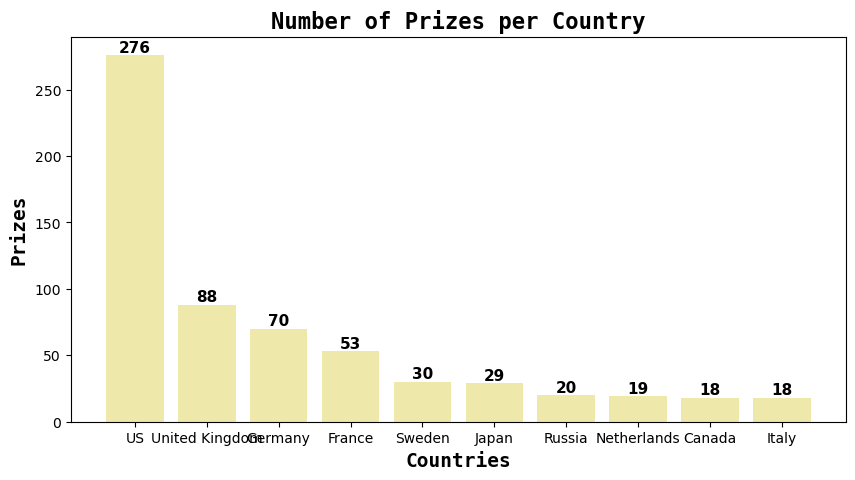

In [112]:
font = font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}

Country_value = df["Birth Country"].value_counts()[:10]
Countries = df["Birth Country"].value_counts().sort_values(ascending = False)[:10].index

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(Countries,Country_value, color = 'palegoldenrod', tick_label = Countries)
ax.set_title("Number of Prizes per Country", fontdict = font, size = 16)
ax.set_xlabel("Countries",fontdict = font, size = 14 )
ax.set_ylabel("Prizes",fontdict = font, size = 14 )
for rect in ax.patches:
    ax.annotate('{:.0f}'.format(rect.get_height()), (rect.get_x()+0.4, rect.get_height()),
                        ha='center', va='bottom',
                        color= 'black', weight = "bold", fontsize = 11)

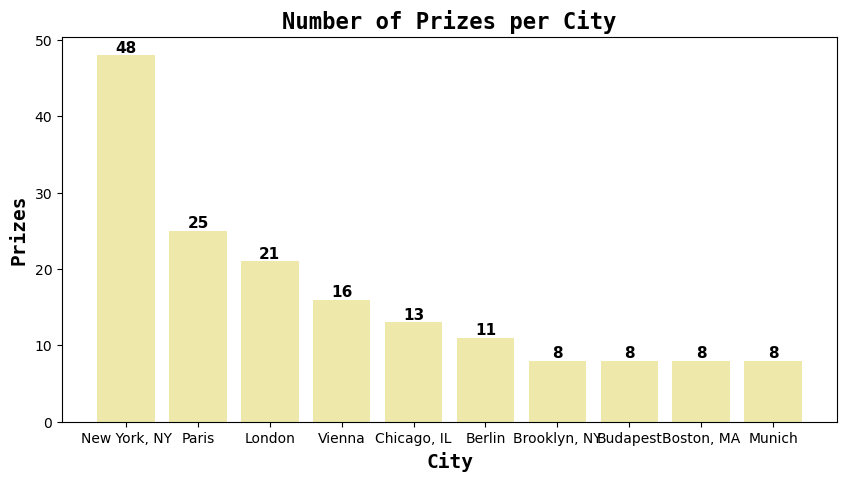

In [269]:
font = font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}

City_value = df["Birth City"].value_counts()[:10]
Cities = df["Birth City"].value_counts().sort_values(ascending = False)[:10].index

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(Cities,City_value, color = 'palegoldenrod', tick_label = Cities)
ax.set_title("Number of Prizes per City", fontdict = font, size = 16)
ax.set_xlabel("City",fontdict = font, size = 14 )
ax.set_ylabel("Prizes",fontdict = font, size = 14 )
for rect in ax.patches:
    ax.annotate('{:.0f}'.format(rect.get_height()), (rect.get_x()+0.4, rect.get_height()),
                        ha='center', va='bottom',
                        color= 'black', weight = "bold", fontsize = 11)

- Most winner come from US and United Kingdom
- Japan is the only Asia country appear in top 10 coutries with highest prizes

#### Number of Prizes for each category

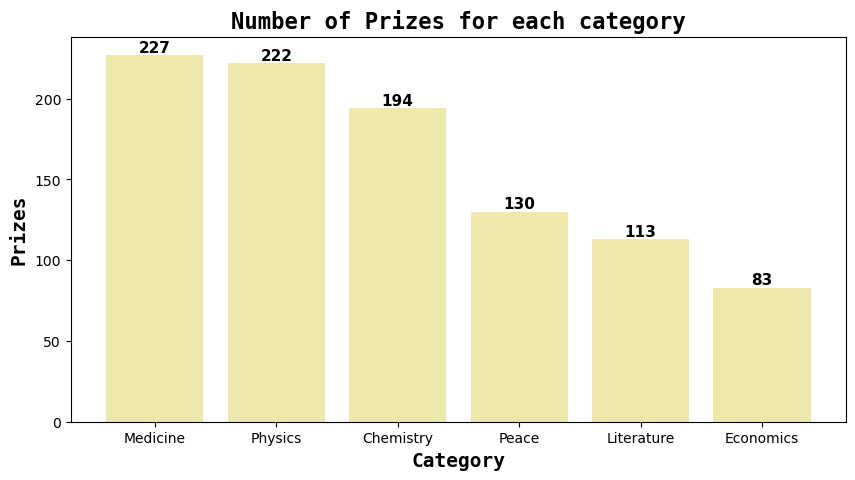

In [68]:
font = font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}

Category = df["Category"].value_counts()
Categories = df["Category"].value_counts().sort_values(ascending = False).index

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(Categories,Category, color = 'palegoldenrod', )
ax.set_title("Number of Prizes for each category", fontdict = font, size = 16)
ax.set_xlabel("Category",fontdict = font, size = 14 )
ax.set_ylabel("Prizes",fontdict = font, size = 14 )
for rect in ax.patches:
    ax.annotate('{:.0f}'.format(rect.get_height()), (rect.get_x()+0.4, rect.get_height()),
                        ha='center', va='bottom',
                        color= 'black', weight = "bold", fontsize = 11)

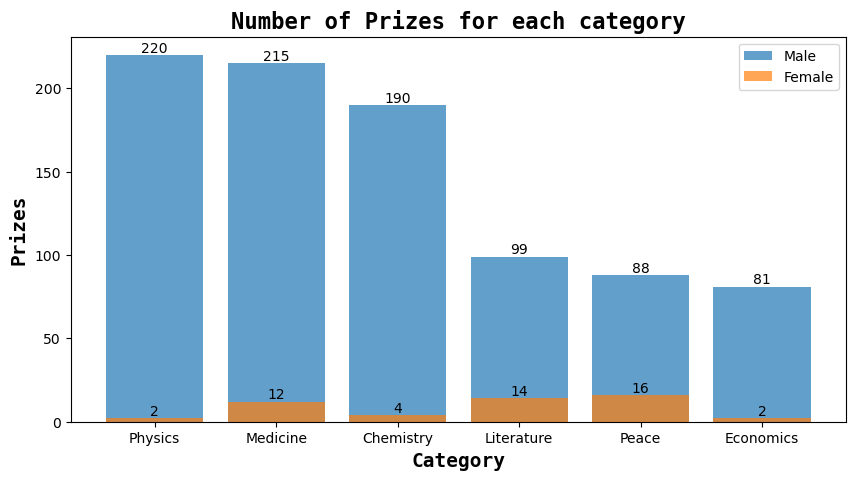

In [186]:
Category_sex = df.groupby(['Category','Sex'])['Full Name'].count().unstack().sort_values(by='Male', ascending = False)
font = font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(Category_sex.index, Category_sex['Male'], label = 'Male', alpha = 0.7)
ax.bar(Category_sex.index, Category_sex['Female'], label = 'Female', alpha = 0.7)
ax.set_title("Number of Prizes for each category", fontdict = font, size = 16)
ax.set_xlabel("Category",fontdict = font, size = 14 )
ax.set_ylabel("Prizes",fontdict = font, size = 14 )
for rect in ax.patches:
    ax.annotate('{:.0f}'.format(rect.get_height()), (rect.get_x()+0.4, rect.get_height()),
                        ha='center', va='bottom',
                        color= 'black', weight = "normal", fontsize = 10)
ax.legend()

- Most winner in all category are men, but it is seem that in **Literature** and **Peace** there are more percentage of women winning Oscar
- In the other hand, 220/222 **Physics** Oscar winner are men - which is 99% 

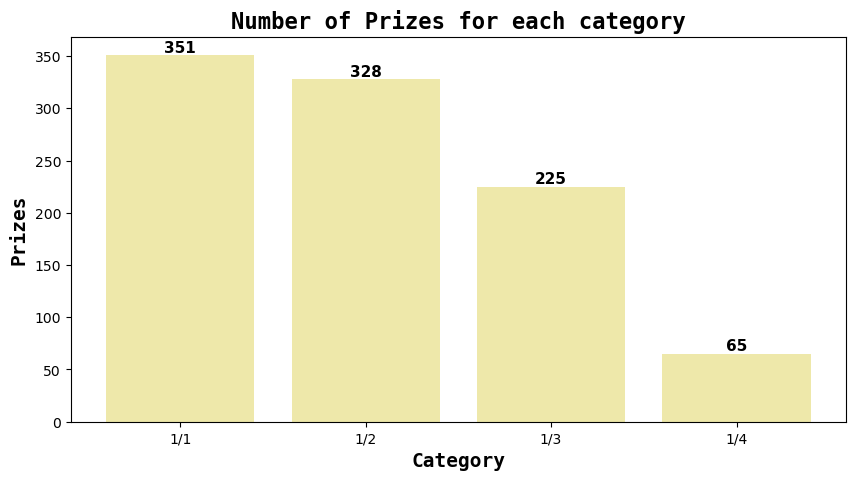

In [187]:
font = font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}

share_value = df["Prize Share"].value_counts()
share = df["Prize Share"].value_counts().sort_values(ascending = False).index

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(share,share_value, color = 'palegoldenrod', )
ax.set_title("Number of Prizes for each category", fontdict = font, size = 16)
ax.set_xlabel("Category",fontdict = font, size = 14 )
ax.set_ylabel("Prizes",fontdict = font, size = 14 )
for rect in ax.patches:
    ax.annotate('{:.0f}'.format(rect.get_height()), (rect.get_x()+0.4, rect.get_height()),
                        ha='center', va='bottom',
                        color= 'black', weight = "bold", fontsize = 11)

#### Prize by Types and Gender

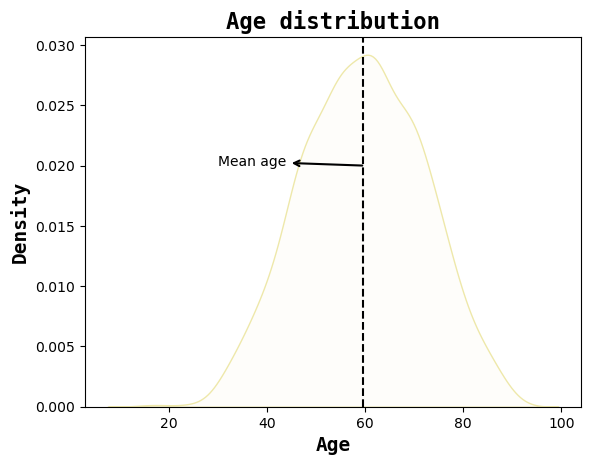

In [241]:
import seaborn as sns
font = font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}
g = sns.kdeplot(x = df["Win age"],alpha =0.05 , shade = True, color = "palegoldenrod" )
g.set_title("Age distribution", fontdict = font, size = 16)
g.set_xlabel("Age", fontdict = font, size = 14)
g.set_ylabel("Density", fontdict = font, size = 14)
plt.axvline(np.mean(df["Win age"]), color = 'black', linestyle ="--")
g.annotate("Mean age", xy = (60,0.020),xytext=(30, 0.020), arrowprops=dict(arrowstyle= '<-',color='black',lw=1.5,ls='-'))
plt.show()

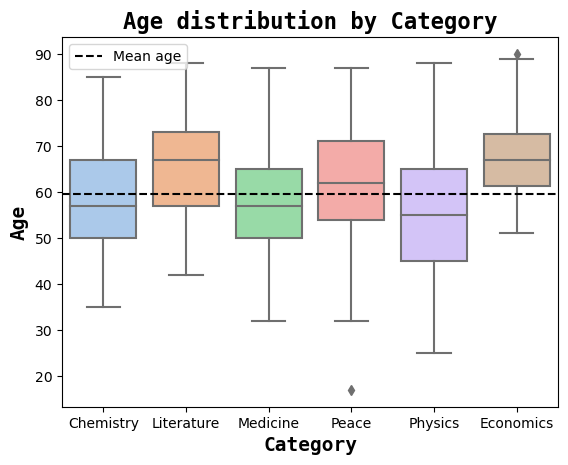

In [261]:
font = font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'fontname' : "monospace"}
g = sns.boxplot(x = df["Category"], y=df["Win age"] ,palette = "pastel"  )
g.set_title("Age distribution by Category", fontdict = font, size = 16)
g.set_xlabel("Category", fontdict = font, size = 14)
g.set_ylabel("Age", fontdict = font, size = 14)
plt.axhline(np.mean(df["Win age"]), color = 'black', linestyle ="--", label = "Mean age")
plt.legend(loc = "upper left")
plt.show()

In [264]:
df.groupby("Category").mean("Win age")["Win age"]

Category
Chemistry     58.134715
Economics     67.158537
Literature    64.672566
Medicine      57.933921
Peace         61.388350
Physics       55.850000
Name: Win age, dtype: float64

- It seem that Economics's winners are among the oldest - with mean age about 67
- Physics and Medicine have lowest mean for win age - only about 55 for Physics and 57 for Medicine 

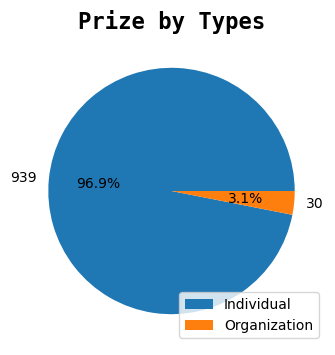

In [93]:
Type_value = df["Laureate Type"].value_counts()
Types = df["Laureate Type"].value_counts().sort_values(ascending = False).index
fig, ax = plt.subplots(figsize=(10, 4))
ax.pie(Type_value, labels = Type_value, autopct='%1.1f%%', startangle=0)
ax.set_title("Prize by Types", fontdict = font, size = 16)
ax.legend(Types, loc = 'lower right')

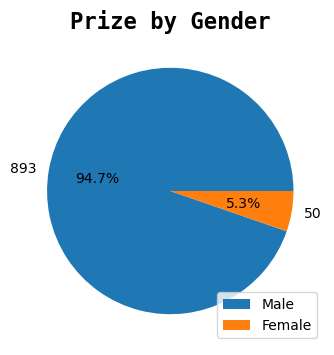

In [94]:
gender_value = df["Sex"].value_counts()
gender = df["Sex"].value_counts().sort_values(ascending = False).index
fig, ax = plt.subplots(figsize=(10, 4))
ax.pie(gender_value, labels = gender_value, autopct='%1.1f%%', startangle=0)
ax.set_title("Prize by Gender", fontdict = font, size = 16)
ax.legend(gender, loc = 'lower right')

### <center> Part 3: Other Insights <a class="anchor" id="part3"></a>

- Youngest winner of all time

In [196]:
df.sort_values(by = "Win age", ascending = True)[["Full Name", "Year", "Win age", "Category"]].head(5)

,Full Name,Year,Win age,Category
940,Malala Yousafzai,2014,17.0,Peace
86,William Lawrence Bragg,1915,25.0,Physics
169,Werner Karl Heisenberg,1932,31.0,Physics
194,Carl David Anderson,1936,31.0,Physics
174,Paul Adrien Maurice Dirac,1933,31.0,Physics


- Oldest winner of all time

In [197]:
df.sort_values(by = "Win age", ascending = False)[["Full Name", "Year", "Win age", "Category"]].head(5)

,Full Name,Year,Win age,Category
825,Leonid Hurwicz,2007,90.0,Economics
904,Lloyd S. Shapley,2012,89.0,Economics
770,Raymond Davis Jr.,2002,88.0,Physics
828,Doris Lessing,2007,88.0,Literature
783,Vitaly L. Ginzburg,2003,87.0,Physics


- First Female to win Oscar

In [193]:
first_female_winner = df.loc[(df['Sex'] =="Female") & (df['Year'] == min(df[df["Sex"]=="Female"]["Year"]))]
first_female_winner[["Full Name", "Year", "Win age", "Category"]]

,Full Name,Year,Win age,Category
19,"Marie Curie, née Sklodowska",1903,36.0,Physics


### Conclusion <a class="anchor" id="4"></a>

#### **Insights**

- 9 of 10 Countries with highest Prize winner are from the **west**, only **Japan** of Asia in top 10.
- **New york**, **Paris** and **London** are top 3 cities that many Oscar winner was born.
- **US** have the highest winner - about 3 times the second country - UK (276 over 88 prizes)
- Most winner are men, with the domination rate - 99% in Physics. But in Peace and Literature, there are a more percentage of female winner than in other categories
- The average win age is **60** - Physics and Medicine are categories that have youngest winner - Economic is the oldest one (67)
- The youngest to win is Malala Yousafzai - only 17 when he won Physics prize in 2014
- The oldest to win is Leonid Hurwicz, at the age 90 - he won Nobel prize in Economics in 2007

***
- Edit by: Tri Hai
- Date: 21/04/2023
- Dataset link: https://www.kaggle.com/datasets/nobelfoundation/nobel-laureates